In [412]:
%matplotlib inline
import os

import scipy
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

## Загрузка данных

In [413]:
paths = glob.glob(f"build/*results*.csv")

In [414]:
data_raw = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=12, names=['name', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'E'])
    data_raw = pd.concat((data_raw, item), ignore_index=True)

## Первичная статистика ускорителя

In [415]:
data = data_raw
data_raw

,name,x,y,z,vx,vy,vz,E
0,gamma,8.62687,18.7803,42.0,0.41231,0.63044,1.54586,1.71963
1,gamma,-2.03114,-17.4397,42.0,-0.073924,-0.555033,1.37733,1.33898
2,e-,-2.291,-19.3907,46.8415,0.350289,-0.13986,0.175045,0.139984
3,gamma,-8.38571,-17.9946,42.0,-0.37091,-0.762739,1.81036,1.99918
4,gamma,-18.9994,-3.01534,42.0,-0.779771,-0.09588,1.97419,2.12478
...,...,...,...,...,...,...,...,...
64146,gamma,-3.74337,18.5595,42.0,-0.161012,0.321916,0.74183,0.82454
64147,neutron,1.98357,18.2676,42.0,0.152601,22.1816,44.2252,0.440392
64148,proton,1.98397,18.3249,42.1142,-22.3687,20.5126,26.3995,0.048527
64149,gamma,13.1304,-16.7909,42.0,0.264733,-0.296535,0.987211,1.06424


In [416]:
l = len(data_raw)
res = []
for name in set(data_raw['name']):
    count = len(data_raw[data_raw['name'] == name])
    res.append((name, count, count/l*100))
    
pd.DataFrame(res, columns=['name', 'count', 'percent'])

,name,count,percent
0,O16,621,0.968029
1,e+,301,0.469205
2,nu_e,808,1.259528
3,anti_nu_e,935,1.457499
4,neutron,2307,3.596203
5,proton,1586,2.472292
6,O17,1,0.001559
7,gamma,39676,61.847828
8,e-,17916,27.927858


## Распределение по координатам

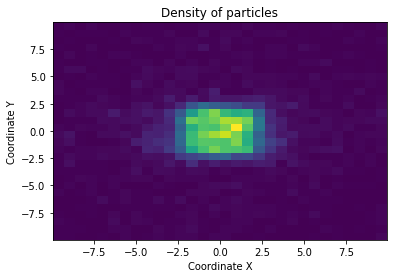

In [417]:
center = data[(-10 < data['x']) & (data['x'] < 10) & (-10 < data['y']) & (data['y'] < 10)]
plt.hist2d(center['x'], center['y'], bins=30)
plt.title('Density of particles')
plt.xlabel('Coordinate X')
plt.ylabel('Coordinate Y')
plt.show()

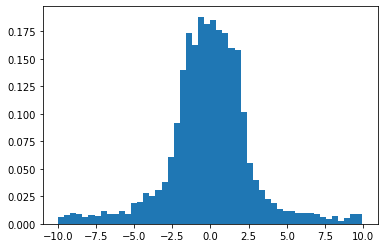

In [418]:
y_bins, x_bins, fff = plt.hist(cnt_x, 50, density=True)

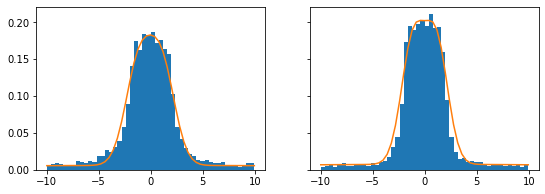

In [419]:
cnt_x = np.array(center['x'], dtype=float)
cnt_y = np.array(center['y'], dtype=float)

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

_, bins, _ = axs[0].hist(cnt_x, 50, density=True)
mu, sigma = scipy.stats.norm.fit(cnt_x)
best_fit_line1 = scipy.stats.norm.pdf(bins, mu+1.13, sigma*0.45)
best_fit_line2 = scipy.stats.norm.pdf(bins, mu-1.13, sigma*0.45)
best_fit_line3 = scipy.stats.norm.pdf(bins, mu, sigma*10)
axs[0].plot(bins, (best_fit_line1+best_fit_line2+best_fit_line3)/2.4)

_, bins, _ = axs[1].hist(cnt_y, 50, density=True)
mu, sigma = scipy.stats.norm.fit(cnt_y)
best_fit_line1 = scipy.stats.norm.pdf(bins, mu+1.13, sigma*0.45)
best_fit_line2 = scipy.stats.norm.pdf(bins, mu-1.13, sigma*0.45)
best_fit_line3 = scipy.stats.norm.pdf(bins, mu, sigma*10)
axs[1].plot(bins, (best_fit_line1+best_fit_line2+best_fit_line3)/2.2)

plt.show()

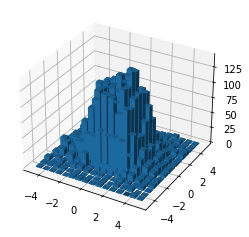

In [420]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = center['x'], center['y']
hist, xedges, yedges = np.histogram2d(x, y, bins=16, range=[[-5, 5], [-5, 5]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

## Распределение по энергиям (взяты только гамма и электроны)

In [421]:
center = data[(-4 < data['x']) & (data['x'] < 4) & (-4 < data['y']) & (data['y'] < 4)]

In [422]:
center_gamma = center[center['name'] == 'gamma']
center_e = center[center['name'] == 'e-']

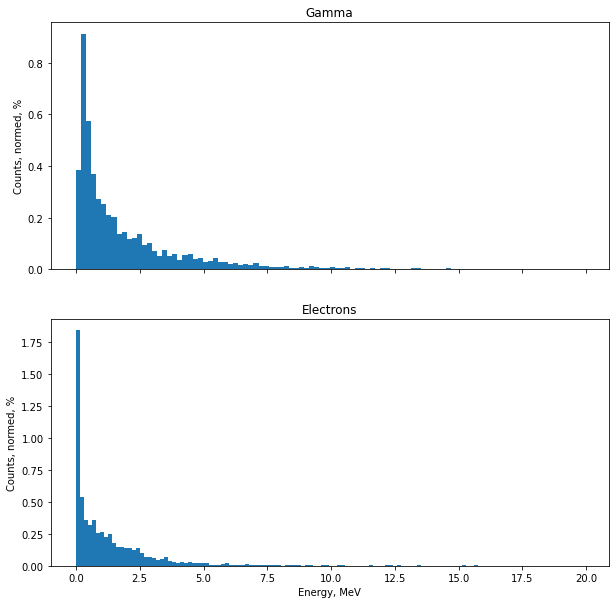

In [423]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

axs[0].hist(center_gamma['E'], bins=100, density=True)
axs[0].set_title('Gamma')
axs[0].set_ylabel('Counts, normed, %')

axs[1].hist(center_e['E'], bins=100, density=True)
axs[1].set_title('Electrons')
axs[1].set_ylabel('Counts, normed, %')
axs[1].set_xlabel('Energy, MeV')
plt.show()

## Распределение по скоростям

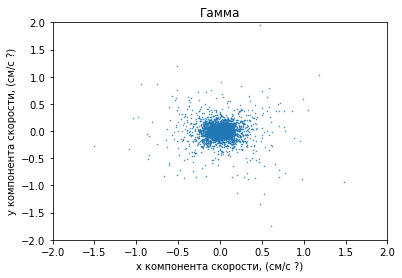

In [424]:
plt.scatter(center_gamma['vx'], center_gamma['vy'], s=0.2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Гамма')
plt.xlabel('x компонента скорости, (см/с ?)')
plt.ylabel('y компонента скорости, (см/с ?)')
plt.show()

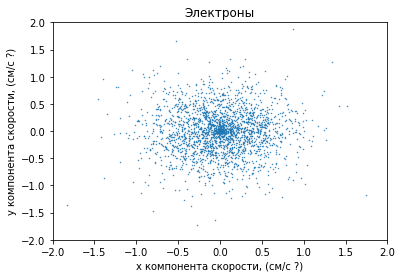

In [425]:
plt.scatter(center_e['vx'], center_e['vy'], s=0.2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Электроны')
plt.xlabel('x компонента скорости, (см/с ?)')
plt.ylabel('y компонента скорости, (см/с ?)')
plt.show()